In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Bidirectional, LSTM, Reshape
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [48]:
input_shape = (224, 224, 3)

In [49]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# dcnn_model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     Dense(1, activation='sigmoid')  # Output layer (binary classification)
# ])

In [50]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Reshape the output of the DCNN for BiLSTM input
# Reshaping to (batch_size, timesteps, features)
# dcnn_model.add(Reshape((1, 512)))

# # Add BiLSTM layer
# dcnn_model.add(Bidirectional(LSTM(64, return_sequences=False)))

# # Add output layer
# # Output layer (binary classification)
# dcnn_model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# dcnn_model.compile(optimizer='adam',
#                    loss='binary_crossentropy',
#                    metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 26, 26, 128)     

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Finalv3/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'Finalv3/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

val_generator = test_datagen.flow_from_directory(
    'Finalv3/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 11590 images belonging to 2 classes.
Found 1449 images belonging to 2 classes.
Found 1450 images belonging to 2 classes.


In [52]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples/val_generator.batch_size
)

Epoch 1/50
362/362 [==============================] - 29s 78ms/step - loss: 0.6226 - accuracy: 0.6460 - val_loss: 0.5339 - val_accuracy: 0.7393
Epoch 2/50
362/362 [==============================] - 29s 80ms/step - loss: 0.4845 - accuracy: 0.7721 - val_loss: 0.4216 - val_accuracy: 0.8103
Epoch 3/50
362/362 [==============================] - 30s 82ms/step - loss: 0.4112 - accuracy: 0.8188 - val_loss: 0.3464 - val_accuracy: 0.8524
Epoch 4/50
362/362 [==============================] - 30s 84ms/step - loss: 0.3570 - accuracy: 0.8481 - val_loss: 0.3634 - val_accuracy: 0.8379
Epoch 5/50
362/362 [==============================] - 30s 84ms/step - loss: 0.3227 - accuracy: 0.8676 - val_loss: 0.2936 - val_accuracy: 0.8779
Epoch 6/50
362/362 [==============================] - 30s 84ms/step - loss: 0.2914 - accuracy: 0.8804 - val_loss: 0.2891 - val_accuracy: 0.8821
Epoch 7/50
362/362 [==============================] - 31s 84ms/step - loss: 0.2752 - accuracy: 0.8888 - val_loss: 0.2410 - val_accuracy:

In [53]:
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=test_generator.samples/test_generator.batch_size
)

45/45 [==============================] - 3s 58ms/step - loss: 0.1563 - accuracy: 0.9510


In [54]:
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9510006904602051


In [55]:
# Save the model
model.save('Models/deepfake_detection_model_DCNN.h5')

46/46 [==============================] - 3s 57ms/step


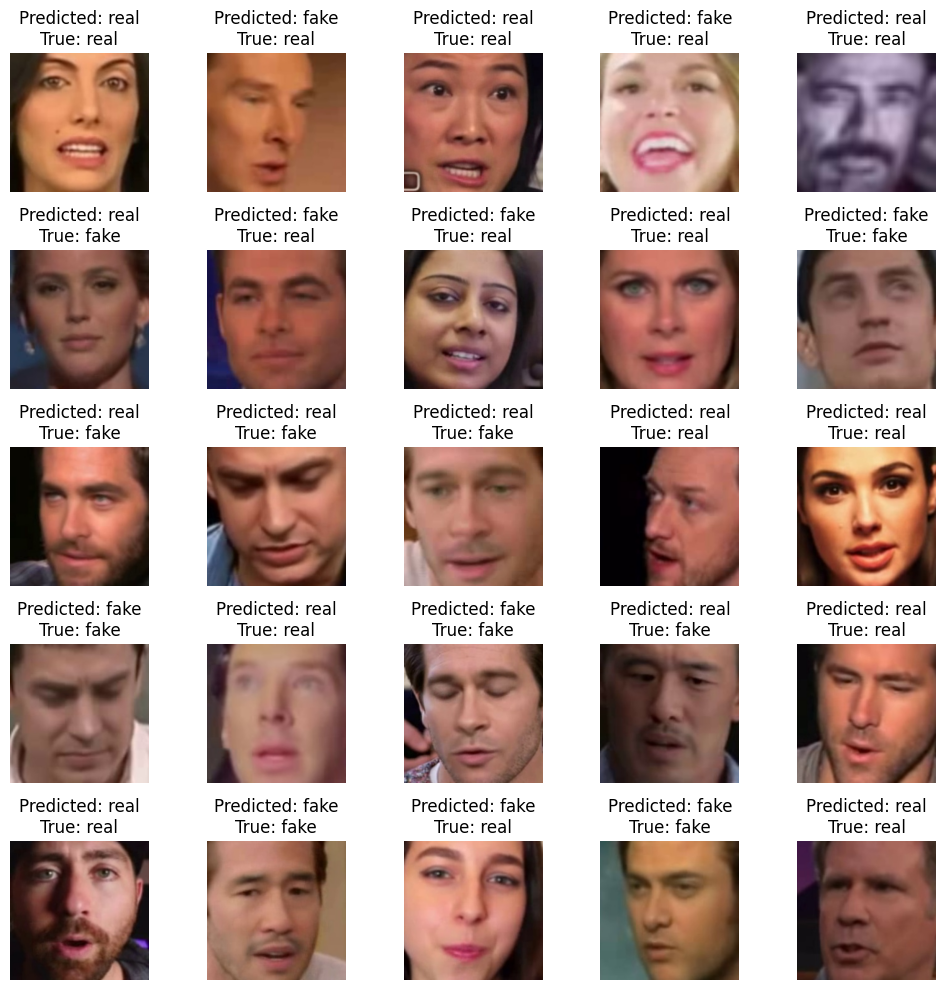

In [56]:
# import matplotlib.pyplot as plt

# # Load the saved model
# model = tf.keras.models.load_model('deepfake_detection_model.h5')

# # Get the class indices for the generator
# class_indices = train_generator.class_indices

# # Get class labels
# class_labels = list(class_indices.keys())

# # Evaluate the model on the test data and get predictions
# test_generator.reset()  # Reset the generator to the beginning
# predictions = model.predict(test_generator)

# # Display the test dataset with predictions
# plt.figure(figsize=(10, 10))
# num_images = 25  # Number of images to display
# for i in range(num_images):
#     # Get the next image and its label
#     image, label = test_generator.next()
#     # Make predictions
#     prediction = predictions[i][0]
#     predicted_label = 'Fake' if prediction > 0.5 else 'Real'
#     true_label = 'Fake' if label[0] > 0.5 else 'Real'

#     # Display the image with its true and predicted labels
#     plt.subplot(5, 5, i + 1)
#     plt.imshow(image[0])
#     plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('Models/deepfake_detection_model_DCNN.h5')

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Evaluate the model on the test data and get predictions
test_generator.reset()  # Reset the generator to the beginning
predictions = model.predict(test_generator)

# Display the test dataset with predictions
plt.figure(figsize=(10, 10))
num_images = 25  # Number of images to display
for i in range(num_images):
    # Get the next image and its label
    image, label = test_generator.next()
    # Make predictions
    prediction = predictions[i][0]
    predicted_label = class_labels[int(round(prediction))]
    true_label = class_labels[int(label[0])]  # Convert label to integer

    # Display the image with its true and predicted labels
    plt.subplot(5, 5, i + 1)
    plt.imshow(image[0])
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

